![](logo.png)

## Unsupervised Learning:
- There won't be any supervision on the model.
- We provide only the input.

###  There are two methods in unsupervised learning
- Clustering -- A cluster refers to a collection of data points aggregated together because of certain similarities.
    - K-Means Clustering
- Associative -- Combines more clusters.

# K-Means Clustering :
- **which groups the unlabeled dataset into different clusters**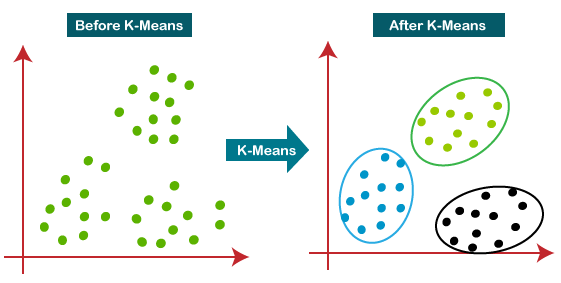

- This is one of the clustering algorithm,which works distance based on distenace two points.
- k is the number of clusters to be formed.
- The means in the K-means refers to averaging of the data; that is, finding the centroid.
- K values sholud be higher for better results.

### Steps involved in k-means clustering:

    K-Means(k-no of clusters)
    choose the optimal value of k
    initializing the centroids
    finding out mean and distances
    repeat step 2 and 3 untill convergence


- Elbow Method
    - Will find the distance of the eachpoint and draw the graph
    - From the graph we will observe and will take the point where slope will be fallen.That point will be considered as k value

**Inertia_** is the sum of squares for all dataset points to their closest centroid

In [2]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [7]:
data = pd.DataFrame(iris.data)
data.columns = iris.feature_names
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=5)

In [11]:
kmeans.fit(data)

KMeans(n_clusters=5)

In [13]:
y_pred = kmeans.predict(data)

In [14]:
data["Predicted_values"] = y_pred
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Predicted_values
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [18]:
data["Predicted_values"].value_counts() # 5 clusters/classes

1    50
4    39
2    25
0    24
3    12
Name: Predicted_values, dtype: int64

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
li = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertia = kmeans.inertia_
    li.append(inertia)
    print(f"the inertia value of {i} is {inertia}")

the inertia value of 1 is 994.9439333333336
the inertia value of 2 is 400.4879263220439
the inertia value of 3 is 193.0433942879298
the inertia value of 4 is 95.35793921568632
the inertia value of 5 is 46.44618205128204
the inertia value of 6 is 39.03998724608725
the inertia value of 7 is 34.860676623376634
the inertia value of 8 is 31.14142257158047
the inertia value of 9 is 28.72621663059164


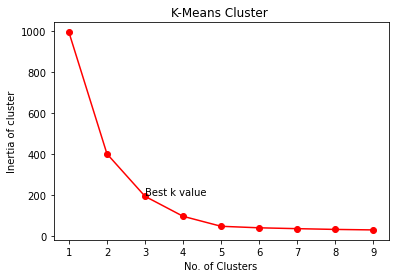

In [27]:
plt.plot(np.arange(1,10),li, marker = "o", c = "red")
plt.text(3,200,"Best k value")
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia of cluster")
plt.title("K-Means Cluster ")
plt.show()

In [28]:
kmeans = KMeans(n_clusters=3)

In [29]:

kmeans.fit(data)

KMeans(n_clusters=3)

In [30]:
kmeans.inertia_

193.0433942879298

In [31]:
shirt = pd.read_csv("https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Classification/shirt.csv")
shirt.head()

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M


In [34]:
shirt["Size"].value_counts()

L    11
M     7
Name: Size, dtype: int64

In [32]:
X = shirt[["Height","Weight"]]

In [35]:
help(KMeans)
# n_clusters  - k = The number of clusters to form as well as the number of centroids to generate.
    
# init = a smart way to speed up convergence

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for 

In [38]:
l = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init ="k-means++")
    km.fit(X)
    inertia = km.inertia_
    l.append(inertia)
    print("the Inertia value of {0} is {1}".format(i,inertia))

the Inertia value of 1 is 429.7777777777777
the Inertia value of 2 is 160.33333333333334
the Inertia value of 3 is 82.33333333333333
the Inertia value of 4 is 55.33333333333334
the Inertia value of 5 is 34.0
the Inertia value of 6 is 25.3
the Inertia value of 7 is 19.666666666666664
the Inertia value of 8 is 14.666666666666666
the Inertia value of 9 is 9.666666666666666
the Inertia value of 10 is 5.666666666666666


In [60]:
kme = KMeans(n_clusters= 2)
kme.fit(X)
kme.inertia_

160.33333333333334

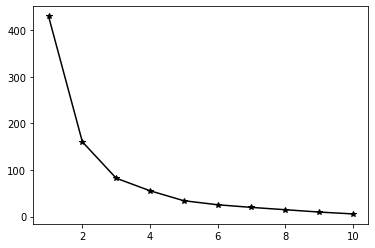

In [41]:
plt.plot(np.arange(1,11),l,marker = "*",color = "black")
plt.show()

In [42]:
km.predict(X)

array([7, 7, 3, 0, 0, 9, 9, 3, 5, 2, 2, 2, 6, 6, 4, 1, 1, 8])

In [43]:
shirt

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


In [51]:
data_M = shirt[shirt["Size"] == "M"]

In [50]:
data_L = shirt[shirt["Size"] == "L"]

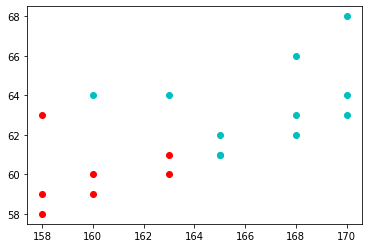

In [56]:
plt.scatter(data_M["Height"], data_M["Weight"], color = "red")
plt.scatter(data_L["Height"], data_L["Weight"], color = "c")

plt.show()

In [63]:
data["Predicted_values"].unique()

array([1, 4, 2, 0, 3])

In [64]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Predicted_values
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,4
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [69]:
g_data = data.groupby("Predicted_values")
g_data.first()
type(g_data.get_group(0))

pandas.core.frame.DataFrame

In [71]:
g_data.get_group(0)["sepal length (cm)"]

100    6.3
103    6.3
104    6.5
108    6.7
110    6.5
111    6.4
112    6.8
114    5.8
115    6.4
116    6.5
120    6.9
124    6.7
128    6.4
132    6.4
136    6.3
137    6.4
139    6.9
140    6.7
141    6.9
143    6.8
144    6.7
145    6.7
147    6.5
148    6.2
Name: sepal length (cm), dtype: float64

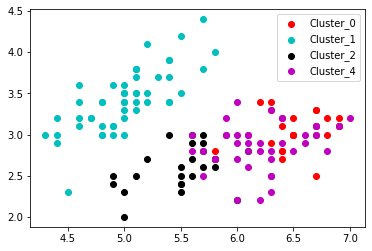

In [92]:
plt.scatter(g_data.get_group(0)["sepal length (cm)"], g_data.get_group(0)["sepal width (cm)"], c = "r", label = "Cluster_0")
plt.scatter(g_data.get_group(1)["sepal length (cm)"], g_data.get_group(1)["sepal width (cm)"], c = "c", label = "Cluster_1")
plt.scatter(g_data.get_group(2)["sepal length (cm)"], g_data.get_group(2)["sepal width (cm)"], c = "black", label = "Cluster_2")
plt.scatter(g_data.get_group(4)["sepal length (cm)"], g_data.get_group(4)["sepal width (cm)"], c = "m", label = "Cluster_4")

plt.legend()
plt.show()

In [79]:
kmeans.cluster_centers_

array([[6.22602740e+00, 2.83013699e+00, 4.77808219e+00, 1.54246575e+00,
        3.23287671e+00],
       [5.00566038e+00, 3.36981132e+00, 1.56037736e+00, 2.90566038e-01,
        1.05660377e+00],
       [6.52916667e+00, 3.05833333e+00, 5.50833333e+00, 2.16250000e+00,
        8.88178420e-16]])

In [108]:
data.drop("Predicted_values",axis =1,inplace = True)

# K - Means

In [109]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_pred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,1


In [80]:
kmeans = KMeans(n_clusters=4)

In [83]:
kmeans.fit(data[data.columns[:-1]])

KMeans(n_clusters=4)

In [85]:
data[data.columns[:-1]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [91]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [6.2525    , 2.855     , 4.815     , 1.625     ]])

In [99]:
data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Predicted_values,y_pred
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,4,3
147,6.5,3.0,5.2,2.0,0,3
148,6.2,3.4,5.4,2.3,0,1


In [98]:
y_pred = kmeans.predict(data)
data["y_pred"] = y_pred


ValueError: Incorrect number of features. Got 6 features, expected 4

In [101]:
data["y_pred"].value_counts()

0    50
3    40
1    32
2    28
Name: y_pred, dtype: int64

In [102]:
g_data = data.groupby("y_pred")
g_data.first()
type(g_data.get_group(0))

pandas.core.frame.DataFrame

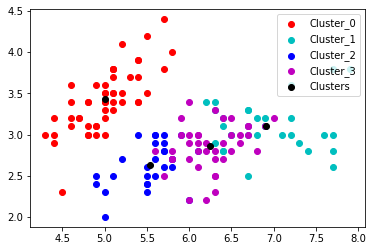

In [106]:
plt.scatter(g_data.get_group(0)["sepal length (cm)"], g_data.get_group(0)["sepal width (cm)"], c = "r", label = "Cluster_0")
plt.scatter(g_data.get_group(1)["sepal length (cm)"], g_data.get_group(1)["sepal width (cm)"], c = "c", label = "Cluster_1")
plt.scatter(g_data.get_group(2)["sepal length (cm)"], g_data.get_group(2)["sepal width (cm)"], c = "b", label = "Cluster_2")
plt.scatter(g_data.get_group(3)["sepal length (cm)"], g_data.get_group(3)["sepal width (cm)"], c = "m", label = "Cluster_3")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = "black" , label = "Clusters")
plt.legend()
plt.show()